In [2]:
import numpy as np
import pandas as pd
#시각화 패키지
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin': rc('font', family='AppleGothic')

import matplotlib 
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
lc_loans = pd.read_csv('../data/lc_loans.csv')

# margin은 view programming에서 컨텐츠와 컨텐츠 사이의 여백이고
# 통계 분야에서는 전체에 관련된 집계 데이터를 의미함.

# columns는 list를 넣을 수 있다, 계층별 표현.
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)

print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [13]:
# grade의 비율을 표시하기 위한 교차 분할 표
df = crosstab.copy().loc['A':'G'] # 복제
df.loc[:, 'Charged Off': 'Late'] = df.loc[:, 'Charged Off': 'Late'].div(df['All'], axis=0)

df['All'] = df['All'] / sum(df['All'])

print(df.head())

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB
None


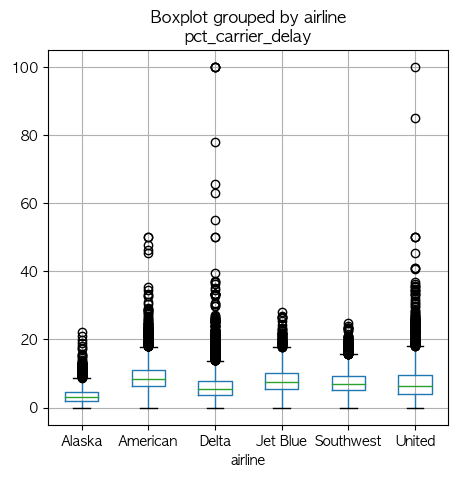

In [21]:
airline_state = pd.read_csv('../data/airline_stats.csv')

# 수치형 데이터의 개수가 너무 많기 때문에 크로스탭을 못 그림
# 분포를 확인하기 어려움.
print(airline_state.info())

ax = airline_state.boxplot(by='airline', column='pct_carrier_delay', figsize=(5, 5))

plt.show()

<Axes: xlabel='airline', ylabel='pct_carrier_delay'>

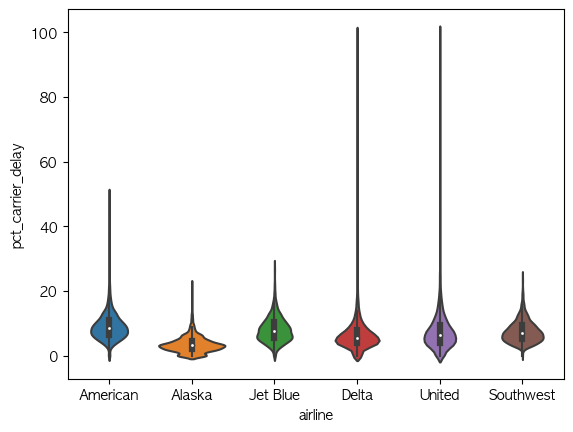

In [24]:
import seaborn as sns
sns.violinplot(data = airline_state, x='airline', y='pct_carrier_delay')